# Samuel Chiang USCID: 7187956023

In [89]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.cluster import KMeans
from scipy.spatial import distance
from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter('ignore')

# 1. Multi-class and Multi-Label Classification Using Support Vector Machines


## (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics. uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [90]:
df = pd.read_csv('data/Frogs_MFCCs.csv')
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [91]:
train_df, test_df = train_test_split(df, train_size=0.7, test_size = 0.3, shuffle=True)

x_train = train_df.iloc[:,:-4]
y_train = train_df.iloc[:,-4:-1]
x_test = test_df.iloc[:,:-4]
y_test = test_df.iloc[:,-4:-1]

## (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-class classification is to train a classifier for each label. We first try this approach:

### i. Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.

Exact Match is the most strict metric for evaluating multi-label classification that indicates the percentage of samples that have all their labels classified correctly.It ignores those partially correct by considering them incorrect and extending the accuracy used in single label case for multi-label prediction. A disadvantage of this measure is that it doesn't distinguish between complete incorrect and partially correct. Exact Match can be found using the accuracy score library in sklearn. The documentation for the library says: in multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

Hamming Loss reports how many times on average, the relevance of an example to a class label is incorrectly predicted. Therefore, hamming loss takes into account the prediction error (an incorrect label is predicted) and the missing error (a relevant label not predicted),normalized over total number of classes and total number of examples.

Resources: https://pdfs.semanticscholar.org/6b56/91db1e3a79af5e3c136d2dd322016a687a0b.pdf

In [92]:
def ExactMatchscore(y_pred, y_test):
    score = 0
    for i in range(y_pred.shape[0]):
        if False not in (y_pred[i,:]==np.array(y_test)[i,:]):
            score+=1      
    return float(score/y_pred.shape[0])

In [93]:
def HammingLoss(y_pred, y_test):
    score = 0
    for i in range(y_pred.shape[0]):
        for j in range(0,3):
            if False == (y_pred[i,j]==np.array(y_test)[i,j]):
                score+=1
    return float(score/(y_pred.shape[0]*3))

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

## Raw Attributes

### Family

In [94]:
params = {'estimator__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],\
              'estimator__gamma' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
svc = GridSearchCV(OneVsRestClassifier(SVC(kernel='rbf')), params, cv=10)
svc.fit(x_train, y_train["Family"])
y_pred_family = svc.predict(x_test)

accuracy = svc.score(x_test, y_test["Family"])

print('The parameters for Gaussian Kernel & One-vs-All Classifiers for Family Label are:', svc.best_params_)
print('The Accuracy for Gaussian Kernel & One-vs-All SVM for Family Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Family"], y_pred_family))

The parameters for Gaussian Kernel & One-vs-All Classifiers for Family Label are: {'estimator__C': 10, 'estimator__gamma': 1}
The Accuracy for Gaussian Kernel & One-vs-All SVM for Family Label is: 0.9925891616489115
The Hamming Loss is: 0.007411


### Genus

In [95]:
svc = GridSearchCV(OneVsRestClassifier(SVC(kernel='rbf')), params, cv=10)
svc.fit(x_train, y_train["Genus"])
y_pred_genus = svc.predict(x_test)
accuracy = svc.score(x_test, y_test["Genus"])

print('The parameters for Gaussian Kernel & One-vs-All Classifiers for Genus Label are:', svc.best_params_)
print('The Accuracy for Gaussian Kernel & One-vs-All SVM for Genus Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Genus"], y_pred_genus))

The parameters for Gaussian Kernel & One-vs-All Classifiers for Genus Label are: {'estimator__C': 10, 'estimator__gamma': 1}
The Accuracy for Gaussian Kernel & One-vs-All SVM for Genus Label is: 0.9893469198703103
The Hamming Loss is: 0.010653


### Species

In [96]:
svc = GridSearchCV(OneVsRestClassifier(SVC(kernel='rbf')), params, cv=10)
svc.fit(x_train, y_train["Species"])
y_pred_species = svc.predict(x_test)

accuracy = svc.score(x_test, y_test["Species"])

print('The parameters for Gaussian Kernel & One-vs-All Classifiers for Species Label are:', svc.best_params_)
print('The Accuracy for Gaussian Kernel & One-vs-All SVM for Species Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Species"], y_pred_species))

The parameters for Gaussian Kernel & One-vs-All Classifiers for Species Label are: {'estimator__C': 10, 'estimator__gamma': 1}
The Accuracy for Gaussian Kernel & One-vs-All SVM for Species Label is: 0.9888837424733673
The Hamming Loss is: 0.011116


### Exact Match & Hamming Score

In [97]:
y_pred_all = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print('Gaussian Kernel & One-vs-All Classifiers Overall Performance: ')
print('Exact Match Score: ', ExactMatchscore(y_pred_all, y_test))
print('Hamming Loss: ', HammingLoss(y_pred_all, y_test))

Gaussian Kernel & One-vs-All Classifiers Overall Performance: 
Exact Match Score:  0.9856415006947661
Hamming Loss:  0.009726725335803613


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [10]:
scaler = preprocessing.StandardScaler()
standard_x_train = scaler.fit_transform(x_train)
standard_x_test = scaler.fit_transform(x_test)
standard_x_train = pd.DataFrame(standard_x_train, columns=x_train.columns)
standard_x_test = pd.DataFrame(standard_x_test, columns=x_test.columns)

### Family

In [11]:
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train, y_train["Family"])
print('The weight of the SVM Penalty for L1-Penalized SVM for the Family Label is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train,  y_train["Family"]) 
y_pred_family = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Family"])
print('The Accuracy for L1-Penalized SVM for Family Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Family"], y_pred_family))

The weight of the SVM Penalty for L1-Penalized SVM for the Family Label is: 1
The Accuracy for L1-Penalized SVM for Family Label is: 0.9295970356646596
The Hamming Loss is: 0.070403


### Genus

In [12]:
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train, y_train["Genus"])
print('The weight of the SVM Penalty for L1-Penalized SVM for the Genus Label is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train,  y_train["Genus"]) 
y_pred_genus = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Genus"])
print('The Accuracy for L1-Penalized SVM for Genus Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Genus"], y_pred_genus))

The weight of the SVM Penalty for L1-Penalized SVM for the Genus Label is: 10
The Accuracy for L1-Penalized SVM for Genus Label is: 0.9490504863362668
The Hamming Loss is: 0.050950


### Species

In [13]:
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train, y_train["Species"])
print('The weight of the SVM Penalty for L1-Penalized SVM for the Species Label is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train,  y_train["Species"]) 
y_pred_species = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Species"])
print('The Accuracy for L1-Penalized SVM for Species Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Species"], y_pred_species))

The weight of the SVM Penalty for L1-Penalized SVM for the Species Label is: 10
The Accuracy for L1-Penalized SVM for Species Label is: 0.9583140342751274
The Hamming Loss is: 0.041686


In [14]:
y_pred_all = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))
print('L1-Penalized SVM Overall Performance: ')
print('Exact Match Score: ', ExactMatchscore(y_pred_all, y_test))
print('Hamming Loss: ', HammingLoss(y_pred_all, y_test))

L1-Penalized SVM Overall Performance: 
Exact Match Score:  0.9143121815655396
Hamming Loss:  0.05434614790798209


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.

In [15]:
sm = SMOTE()

x_train_smote_family, y_train_smote_family = sm.fit_sample(x_train, y_train["Family"])
x_train_smote_genus, y_train_smote_genus = sm.fit_sample(x_train, y_train["Genus"])
x_train_smote_species, y_train_smote_species = sm.fit_sample(x_train, y_train["Species"])

scaler = preprocessing.StandardScaler()

standard_x_train_smote_family = scaler.fit_transform(x_train_smote_family)
standard_x_train_smote_family = pd.DataFrame(standard_x_train_smote_family, columns=x_train.columns)

standard_x_train_smote_genus = scaler.fit_transform(x_train_smote_genus)
standard_x_train_smote_genus = pd.DataFrame(standard_x_train_smote_genus, columns=x_train.columns)

standard_x_train_smote_species = scaler.fit_transform(x_train_smote_species)
standard_x_train_smote_species = pd.DataFrame(standard_x_train_smote_species, columns=x_train.columns)

standard_x_test = scaler.fit_transform(x_test)
standard_x_test = pd.DataFrame(standard_x_test, columns=x_test.columns)

### Family

In [16]:
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train_smote_family, y_train_smote_family)
print('The weight of the SVM Penalty for L1-Penalized SVM for the Family Label (upsampled with SMOTE) is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train_smote_family, y_train_smote_family) 
y_pred_family = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Family"])
print('The Accuracy for L1-Penalized SVM for Family Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Family"], y_pred_family))

The weight of the SVM Penalty for L1-Penalized SVM for the Family Label (upsampled with SMOTE) is: 10
The Accuracy for L1-Penalized SVM for Family Label is: 0.7600741083835109
The Hamming Loss is: 0.239926


### Genus

In [17]:
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train_smote_genus, y_train_smote_genus)
print('The weight of the SVM Penalty for L1-Penalized SVM for the Genus Label (upsampled with SMOTE) is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train_smote_genus,  y_train_smote_genus) 
y_pred_genus = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Genus"])
print('The Accuracy for L1-Penalized SVM for Genus Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Genus"], y_pred_genus))

The weight of the SVM Penalty for L1-Penalized SVM for the Genus Label (upsampled with SMOTE) is: 100
The Accuracy for L1-Penalized SVM for Genus Label is: 0.777211672070403
The Hamming Loss is: 0.222788


### Species

In [18]:
grid_search = GridSearchCV(LinearSVC(penalty = 'l1', dual = False, max_iter=50000), params, cv=10)
grid_search.fit(standard_x_train_smote_species, y_train_smote_species)
print('The weight of the SVM Penalty for L1-Penalized SVM for the Species Label (upsampled with SMOTE) is:', grid_search.best_params_['C'])

#fit the model with best parameters
linear_svc=LinearSVC(penalty='l1', C = grid_search.best_params_['C'], dual=False)
linear_svc.fit(standard_x_train_smote_species,  y_train_smote_species) 
y_pred_species = linear_svc.predict(standard_x_test)

accuracy = linear_svc.score(standard_x_test, y_test["Species"])
print('The Accuracy for L1-Penalized SVM for Species Label is:', accuracy)
print('The Hamming Loss is: %f' %metrics.hamming_loss(y_test["Species"], y_pred_species))

The weight of the SVM Penalty for L1-Penalized SVM for the Species Label (upsampled with SMOTE) is: 10000
The Accuracy for L1-Penalized SVM for Species Label is: 0.7758221398795738
The Hamming Loss is: 0.224178


In [19]:
y_pred_all = np.column_stack((y_pred_family, y_pred_genus, y_pred_species))

print('L1-Penalized (upsampled with SMOTE) SVM Overall Performance: ')
print('Exact Match Score: ', ExactMatchscore(y_pred_all, y_test))
print('Hamming Loss: ', HammingLoss(y_pred_all, y_test))

L1-Penalized (upsampled with SMOTE) SVM Overall Performance: 
Exact Match Score:  0.5669291338582677
Hamming Loss:  0.2289640265555041


## Conclusions

#### This first classifier which used Gaussian kernels & one-versus-all classifiers had the best performance. It's exact match and hamming loss were the best. The L1-penalized SVM's performace wasn't that far off from the first classifier however. The exact match score was 7% lower and the hamming loss was 4% higher. The most astonishing result were the high error rates from the third classifier, where we used SMOTE to handle imbalance problems. This may have been a result of overfitting the model to the data we already had.

# 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set 
## Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

## (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

## (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

## (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [87]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from collections import Counter

hamming_loss_set = []
df = pd.read_csv('data/Frogs_MFCCs.csv')
x_data = df.iloc[:,:-4]
labels = ['Family', 'Genus', 'Species']

# Run the code 50 times as asked
for i in range(1,51):
    df_data = df
    print('Iteration ', i)
    best_n = 0           
    prev_score = 0.0
    # test k ∈ {1, 2, . . . , 50} 
    for n in list(range(2,50)) :
        cluster = KMeans(n_clusters=n)
        cluster.fit(x_data)
        k_labels = cluster.labels_
        score = silhouette_score(x_data, k_labels)
        if score > prev_score:
            prev_score = score
            best_n = n 

    kmeans = KMeans(n_clusters=best_n, random_state=i)
    kmeans.fit(x_data)
    df_data['cluster'] = kmeans.labels_
    
    print('Cluster Num: ',best_n)
    #print(df_data)
    for n in range(0,best_n):
        family = df_data[df_data.cluster == n]['Family'].value_counts().index[0]
        df_data.loc[df_data.cluster == n, 'Family_Majority'] = family
        
        genus = df_data[df_data.cluster == n]['Genus'].value_counts().index[0]
        df_data.loc[df_data.cluster == n, 'Genus_Majority'] = genus

        species = df_data[df_data.cluster == n]['Species'].value_counts().index[0]
        df_data.loc[df_data.cluster == n, 'Species_Majority'] = species
    scores = []
    all_cluster_scores = 0
    for n in range(0,best_n):
        cluster_scores = 0
        cluster = df_data[df_data.cluster == n]
        for l in labels:
            cluster_label = l + '_Majority'
            score = metrics.hamming_loss(cluster[l], cluster[cluster_label])
            cluster_scores+=score*len(cluster[l])
            print('Cluster %d, %s: %f (Majority: %s)' %(n, l, score, cluster[cluster_label].iloc[1]))
        #print(cluster)
        avg_cluster_loss = cluster_scores/(3*len(cluster['Family']))
        all_cluster_scores += cluster_scores
        #scores.append(avg_cluster_loss)
        print('Average Hamming Loss for Cluster %d: %f' %(n ,avg_cluster_loss))
    
    avg_loss = all_cluster_scores/(3*df_data.shape[0])
    print('Hamming Loss for iteration %d: %f' %(i ,avg_loss))
    print('\n')
    hamming_loss_set.append(avg_loss)
print(hamming_loss_set)

Iteration  1
Cluster Num:  4
Cluster 0, Family: 0.039088 (Majority: Hylidae)
Cluster 0, Genus: 0.117264 (Majority: Hypsiboas)
Cluster 0, Species: 0.263844 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 0: 0.140065
Cluster 1, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 1, Genus: 0.515034 (Majority: Ameerega)
Cluster 1, Species: 0.515034 (Majority: Ameeregatrivittata)
Average Hamming Loss for Cluster 1: 0.515034
Cluster 2, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 2, Genus: 0.028587 (Majority: Adenomera)
Cluster 2, Species: 0.028587 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 2: 0.028494
Cluster 3, Family: 0.371847 (Majority: Hylidae)
Cluster 3, Genus: 0.476287 (Majority: Hypsiboas)
Cluster 3, Species: 0.486377 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 3: 0.444837
Hamming Loss for iteration 1: 0.222423


Iteration  2
Cluster Num:  4
Cluster 0, Family: 0.039020 (Majority: Hylidae)
Cluster 0, Genus: 0.142468 

Cluster Num:  4
Cluster 0, Family: 0.039088 (Majority: Hylidae)
Cluster 0, Genus: 0.117264 (Majority: Hypsiboas)
Cluster 0, Species: 0.263844 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 0: 0.140065
Cluster 1, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 1, Genus: 0.028587 (Majority: Adenomera)
Cluster 1, Species: 0.028587 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 1: 0.028494
Cluster 2, Family: 0.371847 (Majority: Hylidae)
Cluster 2, Genus: 0.476287 (Majority: Hypsiboas)
Cluster 2, Species: 0.486377 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 2: 0.444837
Cluster 3, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 3, Genus: 0.515034 (Majority: Ameerega)
Cluster 3, Species: 0.515034 (Majority: Ameeregatrivittata)
Average Hamming Loss for Cluster 3: 0.515034
Hamming Loss for iteration 11: 0.222423


Iteration  12
Cluster Num:  4
Cluster 0, Family: 0.039088 (Majority: Hylidae)
Cluster 0, Genus: 0.117264 (Majority: 

Cluster Num:  4
Cluster 0, Family: 0.425993 (Majority: Hylidae)
Cluster 0, Genus: 0.573105 (Majority: Hypsiboas)
Cluster 0, Species: 0.573556 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 0: 0.524218
Cluster 1, Family: 0.032087 (Majority: Leptodactylidae)
Cluster 1, Genus: 0.032924 (Majority: Adenomera)
Cluster 1, Species: 0.032924 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 1: 0.032645
Cluster 2, Family: 0.042232 (Majority: Hylidae)
Cluster 2, Genus: 0.149321 (Majority: Hypsiboas)
Cluster 2, Species: 0.319759 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 2: 0.170437
Cluster 3, Family: 0.206284 (Majority: Leptodactylidae)
Cluster 3, Genus: 0.495902 (Majority: Adenomera)
Cluster 3, Species: 0.495902 (Majority: AdenomeraAndre)
Average Hamming Loss for Cluster 3: 0.399362
Hamming Loss for iteration 20: 0.234051


Iteration  21
Cluster Num:  4
Cluster 0, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 0, Genus: 0.515034 (Major

Cluster Num:  4
Cluster 0, Family: 0.371847 (Majority: Hylidae)
Cluster 0, Genus: 0.476287 (Majority: Hypsiboas)
Cluster 0, Species: 0.486377 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 0: 0.444837
Cluster 1, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 1, Genus: 0.028587 (Majority: Adenomera)
Cluster 1, Species: 0.028587 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 1: 0.028494
Cluster 2, Family: 0.039088 (Majority: Hylidae)
Cluster 2, Genus: 0.117264 (Majority: Hypsiboas)
Cluster 2, Species: 0.263844 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 2: 0.140065
Cluster 3, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 3, Genus: 0.515034 (Majority: Ameerega)
Cluster 3, Species: 0.515034 (Majority: Ameeregatrivittata)
Average Hamming Loss for Cluster 3: 0.515034
Hamming Loss for iteration 30: 0.222423


Iteration  31
Cluster Num:  4
Cluster 0, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 0, Genus: 0.515034 (Majo

Cluster Num:  4
Cluster 0, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 0, Genus: 0.028587 (Majority: Adenomera)
Cluster 0, Species: 0.028587 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 0: 0.028494
Cluster 1, Family: 0.371847 (Majority: Hylidae)
Cluster 1, Genus: 0.476287 (Majority: Hypsiboas)
Cluster 1, Species: 0.486377 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 1: 0.444837
Cluster 2, Family: 0.039088 (Majority: Hylidae)
Cluster 2, Genus: 0.117264 (Majority: Hypsiboas)
Cluster 2, Species: 0.263844 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 2: 0.140065
Cluster 3, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 3, Genus: 0.515034 (Majority: Ameerega)
Cluster 3, Species: 0.515034 (Majority: Ameeregatrivittata)
Average Hamming Loss for Cluster 3: 0.515034
Hamming Loss for iteration 40: 0.222423


Iteration  41
Cluster Num:  4
Cluster 0, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 0, Genus: 0.028587 (Ma

Cluster Num:  4
Cluster 0, Family: 0.028307 (Majority: Leptodactylidae)
Cluster 0, Genus: 0.028587 (Majority: Adenomera)
Cluster 0, Species: 0.028587 (Majority: AdenomeraHylaedactylus)
Average Hamming Loss for Cluster 0: 0.028494
Cluster 1, Family: 0.515034 (Majority: Dendrobatidae)
Cluster 1, Genus: 0.515034 (Majority: Ameerega)
Cluster 1, Species: 0.515034 (Majority: Ameeregatrivittata)
Average Hamming Loss for Cluster 1: 0.515034
Cluster 2, Family: 0.039088 (Majority: Hylidae)
Cluster 2, Genus: 0.117264 (Majority: Hypsiboas)
Cluster 2, Species: 0.263844 (Majority: HypsiboasCinerascens)
Average Hamming Loss for Cluster 2: 0.140065
Cluster 3, Family: 0.371847 (Majority: Hylidae)
Cluster 3, Genus: 0.476287 (Majority: Hypsiboas)
Cluster 3, Species: 0.486377 (Majority: HypsiboasCordobae)
Average Hamming Loss for Cluster 3: 0.444837
Hamming Loss for iteration 50: 0.222423


[0.2224229789205467, 0.24526291406069028, 0.2224229789205467, 0.2224229789205467, 0.2224229789205467, 0.222422978920

In [88]:
avg_hamming_loss = np.mean(np.array(hamming_loss_set))
avg_hamming_score = np.mean(np.array([1-hamming_loss for hamming_loss in hamming_loss_set]))
std_hamming_loss = np.std(np.array(hamming_loss_set))
print('Average hamming loss for all iterations is:', avg_hamming_loss)
print('Average hamming Score for all iterations is:', avg_hamming_score)
print('Standard deviation hamming loss for all iterations is:', std_hamming_loss)

Average hamming loss for all iterations is: 0.22266851980542043
Average hamming Score for all iterations is: 0.7773314801945794
Standard deviation hamming loss for all iterations is: 0.012933926970863116


## ISLR 10.7.2 

**Suppose that we have four observations, for which we compute a dissimilarity matrix, given by
$$\begin{bmatrix}& 0.3 & 0.4 & 0.7 \\  0.3 & & 0.5 & 0.8 \\ 0.4 & 0.5 &  & 0.45 \\ 0.7 & 0.8 & 0.45 & \end{bmatrix}$$
For instance, the dissimilarity between the first and second observations is 0.3, and the dissimilarity between the second and fourth observations is 0.8.**

**(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.**

*Step 1: 0.3 is the minimum dissimilarity, so we fuse observations 1 and 2 to form cluster (1,2) at height 0.3. We now have the new dissimilarity matrix $$\begin{bmatrix}& 0.5 & 0.8 \\ 0.5 & & 0.45 \\ 0.8 & 0.45 & \end{bmatrix}$$*

*Step 2: 0.45 is the minimum dissimilarity, so we fuse observations 3 and 4 to form cluster (3,4) at height 0.45. $$\begin{bmatrix} & 0.8 \\ 0.8 &  \end{bmatrix}$$*

*Step 3: We then fuse all the remaining clusters at height 0.8.*

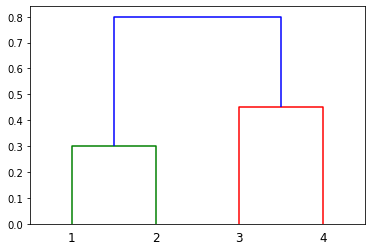

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform


dataset = np.array([[0, 0.3, 0.4, 0.7], 
                    [0.3, 0, 0.5 , 0.8], 
                    [0.4, 0.5, 0, 0.45], 
                    [0.7, 0.8, 0.45, 0]])
data_square = squareform(dataset)
linkage_matrix = linkage(data_square, "complete")
dn = dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.show()

**(b) Repeat (a), this time using single linkage clustering.**

*Step 1: 0.3 is the minimum dissimilarity, so we fuse observations 1 and 2 to form cluster (1,2) at height 0.3. We now have the new dissimilarity matrix $$\begin{bmatrix}& 0.4 & 0.7 \\ 0.4 & & 0.45 \\ 0.7 & 0.45 & \end{bmatrix}$$*

*Step 2: 0.4 is the minimum dissimilarity, so we fuse observations (1,2) and 3 to form cluster ((1,2),3) at height 0.4. $$\begin{bmatrix} & 0.45 \\ 0.45 &  \end{bmatrix}$$*

*Step 3: We then fuse all the remaining clusters at height 0.45.*

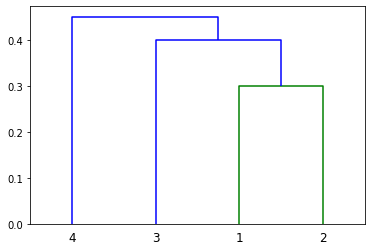

In [112]:
linkage_matrix = linkage(data_square, "single")
dn = dendrogram(linkage_matrix, labels=["1", "2", "3", "4"])
plt.show()

**(c) Suppose that we cut the dendogram obtained in (a) such that two clusters result. Which observations are in each cluster?**

*Observations (1, 2) are in Cluster A, while (3, 4) in Cluster B.*

**(d) Suppose that we cut the dendogram obtained in (b) such that two clusters result. Which observations are in each cluster?**

*Observations ((1, 2),3) are in Cluster A, while (4) is in Cluster B.*

**(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.**

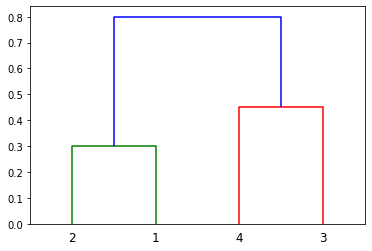

In [113]:
linkage_matrix = linkage(data_square, "complete")
dn = dendrogram(linkage_matrix, labels=["2", "1", "4", "3"])
plt.show()